In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
from keras.preprocessing.image import ImageDataGenerator

from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

from keras import backend as K 

Using TensorFlow backend.


In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
from pathlib import Path
from fastai import *
from fastai.vision import *
import torch
%matplotlib inline

In [4]:

import matplotlib.pyplot as plt
from fastai.imports import *

In [5]:

path ='/home/sohel/Downloads/256_ObjectCategories'


In [6]:
tfms = get_transforms(do_flip=False, 
                      flip_vert=True,
                      max_rotate= 20,
                      max_zoom=1.1,
                      max_lighting=0.3, max_warp=0.2)

In [7]:
np.random.seed(42)
data_bigger = ImageDataBunch.from_folder(path, train=".",
                                         valid_pct=0.15,
                                         ds_tfms=tfms, #get_transforms(),
                                         size=128,
                                         num_workers=4).normalize(imagenet_stats)

In [8]:
data_bigger.classes

['001.ak47',
 '002.american-flag',
 '003.backpack',
 '004.baseball-bat',
 '005.baseball-glove',
 '006.basketball-hoop',
 '007.bat',
 '008.bathtub',
 '009.bear',
 '010.beer-mug',
 '011.billiards',
 '012.binoculars',
 '013.birdbath',
 '014.blimp',
 '015.bonsai-101',
 '016.boom-box',
 '017.bowling-ball',
 '018.bowling-pin',
 '019.boxing-glove',
 '020.brain-101',
 '021.breadmaker',
 '022.buddha-101',
 '023.bulldozer',
 '024.butterfly',
 '025.cactus',
 '026.cake',
 '027.calculator',
 '028.camel',
 '029.cannon',
 '030.canoe',
 '031.car-tire',
 '032.cartman',
 '033.cd',
 '034.centipede',
 '035.cereal-box',
 '036.chandelier-101',
 '037.chess-board',
 '038.chimp',
 '039.chopsticks',
 '040.cockroach',
 '041.coffee-mug',
 '042.coffin',
 '043.coin',
 '044.comet',
 '045.computer-keyboard',
 '046.computer-monitor',
 '047.computer-mouse',
 '048.conch',
 '049.cormorant',
 '050.covered-wagon',
 '051.cowboy-hat',
 '052.crab-101',
 '053.desk-globe',
 '054.diamond-ring',
 '055.dice',
 '056.dog',
 '057.dol

In [9]:
data_bigger.c

257

In [10]:
len(data_bigger.train_ds)


26016

In [11]:
len(data_bigger.valid_ds)

4591

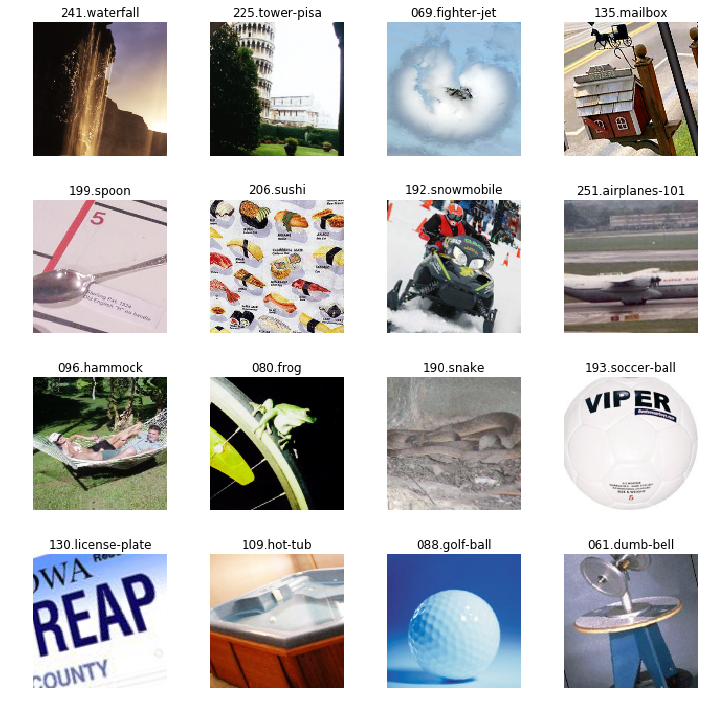

In [12]:
data_bigger.show_batch(rows=4, figsize=(10,10))


In [13]:
import numpy as np
import pandas as pd
from pathlib import Path
from fastai import *
from fastai.vision import *
import torch
%matplotlib inline

In [14]:
learn = cnn_learner(data_bigger, models.resnet50, metrics=[error_rate, accuracy], wd=0.1)

In [15]:
from fastai.vision import * 
from fastai import *
from fastai.callbacks import *
import scipy.ndimage

In [16]:
learn.unfreeze()

In [17]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.00E-03
Min loss divided by 10: 5.25E-04


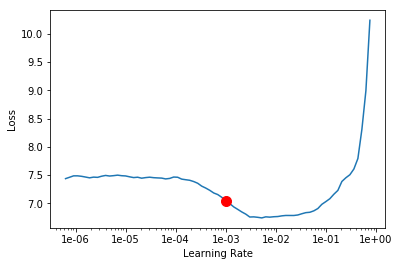

In [18]:
learn.recorder.plot(suggestion=True)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.248730,2.012277,0.441298,0.558702,33:10
1,2.084420,1.589345,0.377478,0.622522,33:46
2,1.493661,1.201198,0.291875,0.708125,33:34
3,0.886355,0.901733,0.227837,0.772163,34:00
4,0.515420,0.818946,0.201481,0.798519,34:01


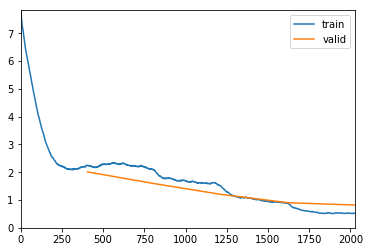

Better model found at epoch 0 with valid_loss value: 2.0122768878936768.
Better model found at epoch 1 with valid_loss value: 1.5893453359603882.
Better model found at epoch 2 with valid_loss value: 1.2011979818344116.
Better model found at epoch 3 with valid_loss value: 0.901732861995697.
Better model found at epoch 4 with valid_loss value: 0.8189459443092346.


In [19]:
learn.fit_one_cycle(5, max_lr=slice(5e-5, 5e-3),callbacks=[ShowGraph(learn),SaveModelCallback(learn)]) #50

In [20]:
learn.save("model_final_a")

In [21]:
learn.load("model_final_a");

In [22]:
preds = learn.get_preds()
preds

[tensor([[1.3123e-08, 4.2865e-08, 2.2621e-07,  ..., 6.4788e-09, 1.9712e-07,
          1.3191e-07],
         [1.4260e-01, 9.0175e-06, 2.4908e-05,  ..., 2.6956e-06, 3.5370e-05,
          8.6663e-06],
         [1.9178e-03, 1.6412e-04, 2.8593e-03,  ..., 1.5785e-04, 2.5351e-05,
          9.0468e-05],
         ...,
         [1.5723e-07, 1.2994e-06, 1.6336e-07,  ..., 1.0556e-07, 1.6442e-06,
          2.1245e-06],
         [1.1267e-06, 7.7310e-07, 2.3515e-06,  ..., 4.8164e-08, 3.8803e-08,
          8.3057e-09],
         [1.2361e-06, 4.3837e-06, 1.3117e-07,  ..., 4.0525e-06, 1.0217e-06,
          9.9307e-01]]), tensor([ 31, 172, 158,  ...,  24, 231, 256])]

In [23]:
preds[1][0]

tensor(31)

In [24]:
len(preds[0]), len(preds[1])

(4591, 4591)

In [25]:
learn.get_preds(ds_type=DatasetType.Train)

[tensor([[2.1460e-07, 8.4826e-07, 2.7094e-08,  ..., 3.7333e-07, 1.9062e-07,
          6.0172e-07],
         [1.1739e-03, 9.3835e-05, 1.2399e-04,  ..., 1.2597e-03, 1.1795e-03,
          8.6428e-03],
         [7.0320e-09, 6.0874e-09, 9.9931e-09,  ..., 3.9382e-09, 7.8117e-09,
          2.2389e-09],
         ...,
         [3.0023e-08, 3.0718e-09, 4.0686e-08,  ..., 7.5476e-09, 6.2089e-08,
          9.4991e-09],
         [2.9534e-07, 6.1811e-08, 3.1295e-10,  ..., 3.3361e-08, 4.7535e-08,
          1.9629e-06],
         [5.3515e-07, 6.5608e-09, 4.9288e-06,  ..., 5.8726e-07, 3.2174e-08,
          8.1663e-09]]), tensor([250,  88,  80,  ..., 133, 185,  11])]

In [26]:
learn.get_preds(with_loss=True)

[tensor([[1.3123e-08, 4.2865e-08, 2.2621e-07,  ..., 6.4788e-09, 1.9712e-07,
          1.3191e-07],
         [1.4260e-01, 9.0175e-06, 2.4908e-05,  ..., 2.6956e-06, 3.5370e-05,
          8.6663e-06],
         [1.9178e-03, 1.6412e-04, 2.8593e-03,  ..., 1.5785e-04, 2.5351e-05,
          9.0468e-05],
         ...,
         [1.5723e-07, 1.2994e-06, 1.6336e-07,  ..., 1.0556e-07, 1.6442e-06,
          2.1245e-06],
         [1.1267e-06, 7.7310e-07, 2.3515e-06,  ..., 4.8164e-08, 3.8803e-08,
          8.3057e-09],
         [1.2361e-06, 4.3837e-06, 1.3117e-07,  ..., 4.0525e-06, 1.0217e-06,
          9.9307e-01]]),
 tensor([ 31, 172, 158,  ...,  24, 231, 256]),
 tensor([1.3088e-03, 6.3445e-01, 3.6528e-01,  ..., 5.7985e-03, 5.9245e-05,
         6.9531e-03])]

In [27]:
#Return the calculated loss and the metrics of the current model on the given data loader dl. The default data loader dl is the validation dataloader.

#You can check the default metrics of the learner using:

str(learn.metrics)

'[<function error_rate at 0x7f75669806a8>, <function accuracy at 0x7f7566980488>]'

In [28]:
learn.validate()

[0.81894594, tensor(0.2015), tensor(0.7985)]

In [29]:
log_preds, y = learn.TTA(scale=1.05)#default none-1.35 for experiment;(1.10,1.,25,,1.05) 


In [30]:
accuracy(log_preds, y)

tensor(0.8162)

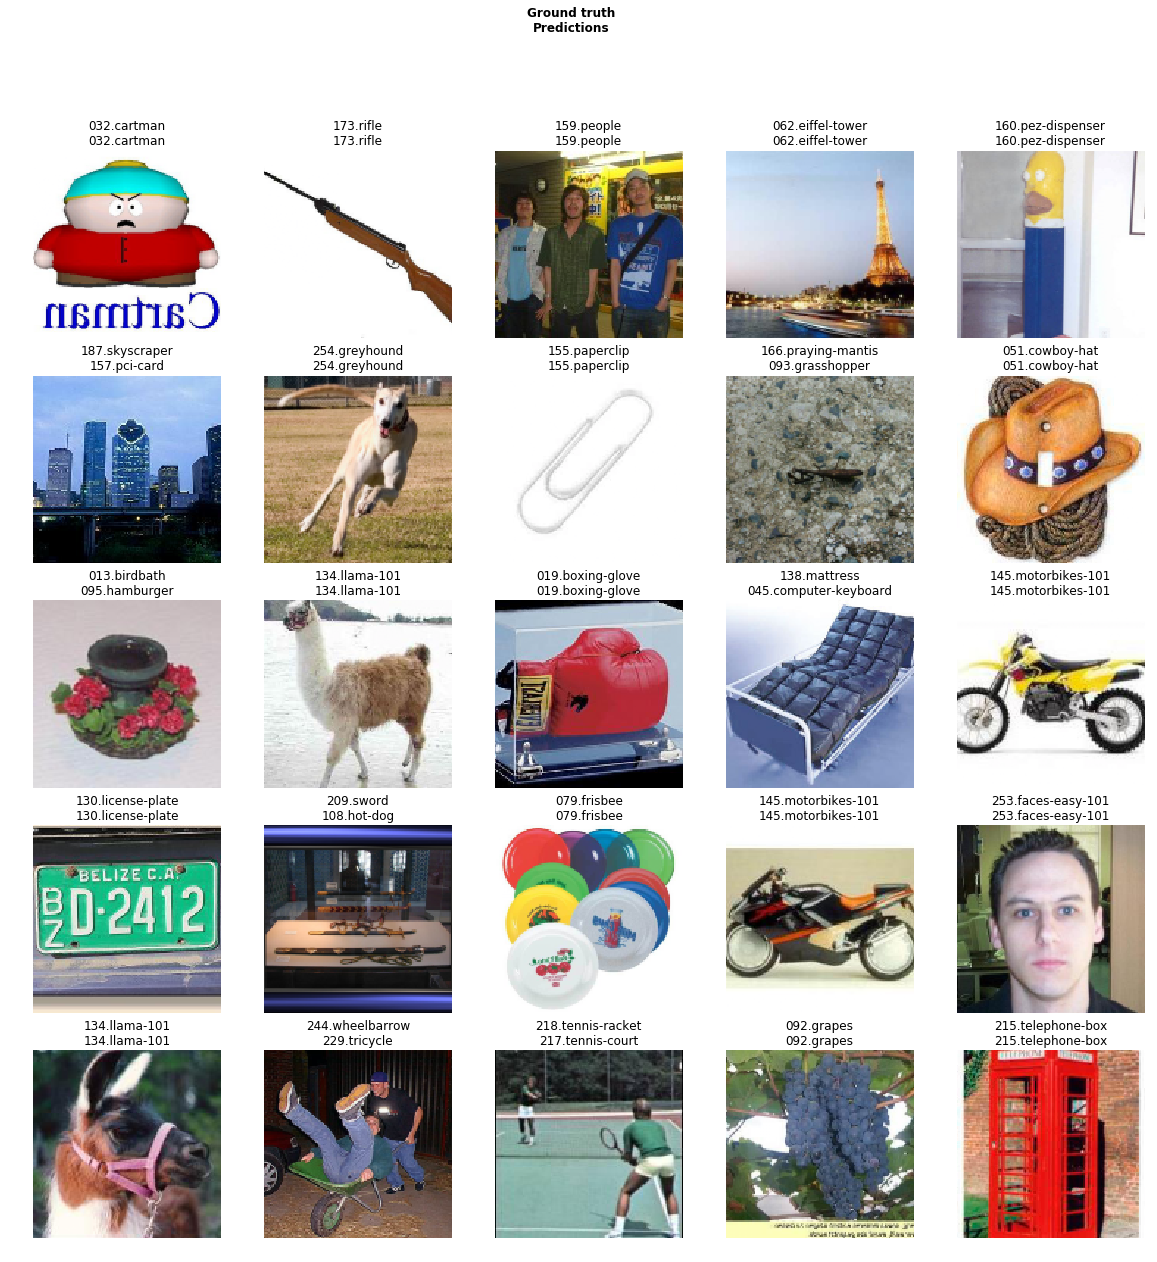

In [31]:
learn.show_results()

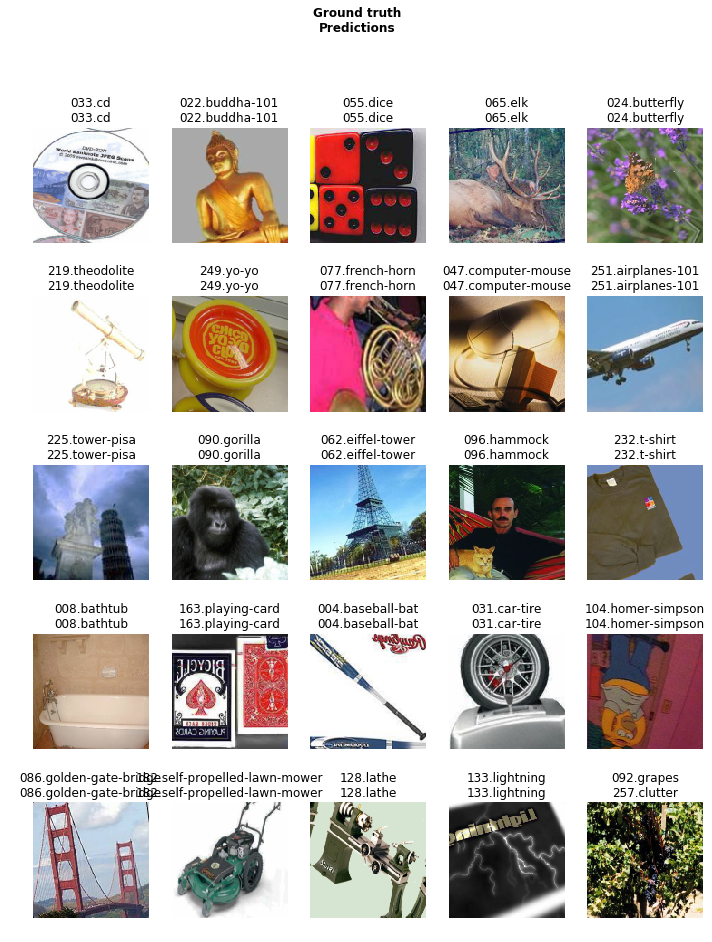

In [32]:
#2nd way to show output
learn.show_results(ds_type=DatasetType.Train,figsize=(12,15))

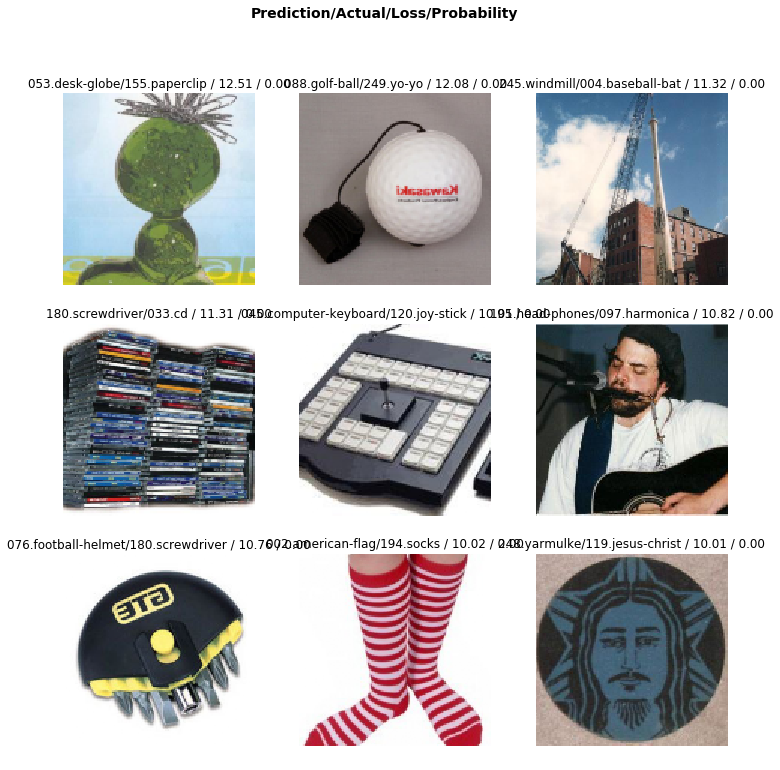

In [33]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(12,12))